<a href="https://colab.research.google.com/github/PDP1004/CNN_Money/blob/main/CNN_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Tien/train/train',target_size=(150,150), batch_size=1, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Tien/train/validation',target_size=(150,150), batch_size=1, class_mode='categorical')

Found 120 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [ ]:
training_set.class_indices

{'01k': 0, '02k': 1, '05k': 2, '10k': 3, '20k': 4, '50k': 5}

In [ ]:
#Tạo Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 64)      

In [ ]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 100, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=70)])

Epoch 1/100
120/120 [==============================] - 3s 23ms/step - loss: 16.1140 - accuracy: 0.2000 - val_loss: 2.5840 - val_accuracy: 0.3083
Epoch 2/100
120/120 [==============================] - 3s 21ms/step - loss: 4.6761 - accuracy: 0.3167 - val_loss: 1.7028 - val_accuracy: 0.4667
Epoch 3/100
120/120 [==============================] - 3s 21ms/step - loss: 3.3110 - accuracy: 0.4667 - val_loss: 3.5226 - val_accuracy: 0.2667
Epoch 4/100
120/120 [==============================] - 3s 21ms/step - loss: 3.0772 - accuracy: 0.6417 - val_loss: 1.6009 - val_accuracy: 0.6000
Epoch 5/100
120/120 [==============================] - 3s 21ms/step - loss: 4.8468 - accuracy: 0.7500 - val_loss: 1.2617 - val_accuracy: 0.7000
Epoch 6/100
120/120 [==============================] - 3s 21ms/step - loss: 1.7313 - accuracy: 0.7583 - val_loss: 1.3081 - val_accuracy: 0.7167
Epoch 7/100
120/120 [==============================] - 3s 21ms/step - loss: 0.9124 - accuracy: 0.8750 - val_loss: 2.6339 - val_accuracy

Sai số kiểm tra là:  5.88447380065918
Độ chính xác kiểm tra là:  0.7833333611488342


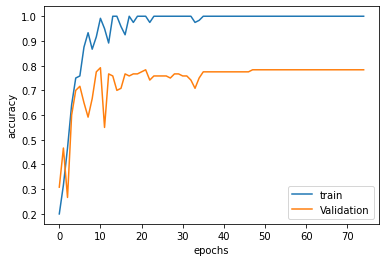

In [ ]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
model.save('CNN_Money.h5')

In [ ]:
CNN_Money=load_model('CNN_Money.h5')

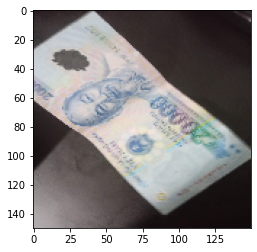

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Tien/test/20k/20k (7).jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
pre=np.argmax(CNN_Money.predict(img),axis=1)
pred = model.predict(img)

classes = ['1000 VND','2000 VND', '5000 VND', '10000 VND', '20000 VND', '50000 VND']

In [ ]:
print(np.argmax(pred))
if pre == 0:
  print(classes[0])
elif pre == 1:
    print(classes[1])
elif pre == 2:
    print(classes[2])
elif pre == 3:
    print(classes[3])
elif pre == 4:
    print(classes[4])
else: print(classes[5])

4
20000 VND
